In [1]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.1 MB/s 
     |████████████████████████████████| 8.2 MB 15.6 MB/s 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import re
import pymorphy2
import codecs

In [3]:
wf_comments = {} #word frequency of coms and posts
wf_posts={}

In [5]:
def updateWFD(los, wfd): # los - list of strings, wfd - word frequncy dict
  for word in los:
    wfd[word] = wfd.get(word, 0) + 1
  

In [6]:
def format(string):
  string =  re.sub(r'[0-9]|[a-zA-z]|[^\w\s]', '', string).lower() # removes all punctuation, latin symbols, digits and lower string
  morpher = pymorphy2.MorphAnalyzer() # using for getting normal form of word
  los = string.split()
  los = list(map(lambda x:morpher.parse(x)[0].normal_form, los)) #list of normal forms of words in string
  return los


In [7]:
with codecs.open('letnyayashkola_vk.json', "r", "utf_8_sig") as json_file: # without codecs drops UnicodeDecodeError
    data = json.load(json_file)

In [24]:
#data[1]
#data[1].keys()
#data[1]['text'] #- text of 1st post
#data[1]['comments'].keys() - unuseful staff
#data[1]['textcomment']['items'][0]['text'] #text of 0-th comment

dict_keys(['date', 'from_id', 'id', 'likes', 'owner_id', 'parents_stack', 'post_id', 'text', 'thread'])

In [25]:
for post in data: # takes ~50 mins with word normalization
     updateWFD(format(post['text']), wf_posts)  
     for comment in post['textcomment']['items']:
       updateWFD(format(comment['text']), wf_comments)

In [32]:
wf_posts = pd.DataFrame.from_dict(wf_posts, orient='index')
wf_comments = pd.DataFrame.from_dict(wf_comments, orient='index')

TypeError: ignored

In [33]:
wf_posts.columns = ['кол-во']
wf_comments.columns=['кол-во']

In [37]:
with open('stopwords.txt') as kicklist_file: #using banlist from 4-th task
  kicklist = set(kicklist_file.read().split())
  wf_posts = wf_posts.drop(filter(lambda x: x in kicklist, wf_posts.index.values))
  wf_comments = wf_comments.drop(filter(lambda x: x in kicklist, wf_comments.index.values))

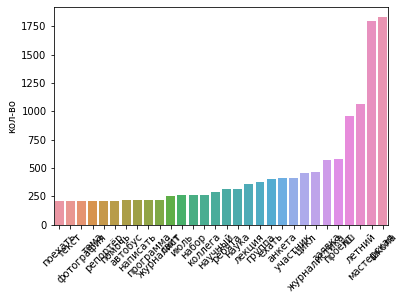

In [34]:
wf_posts = wf_posts.sort_values(by=['кол-во'])
posts_plot = sns.barplot(x = wf_posts[-30:].index.values, y=wf_posts['кол-во'][-30:]) #top 30 most used words
posts_plot.set_xticklabels(posts_plot.get_xticklabels(), rotation=45) #readable words on plot
posts_plot

Самые частые слова - "летний", "школа", "мастерская" (с уч. нормализации).


Судя по частоте слова "журанилстика", она на ЛШ - одно из самых развитых направлений.

К сожалению, на ЛШ наука не на первом месте.

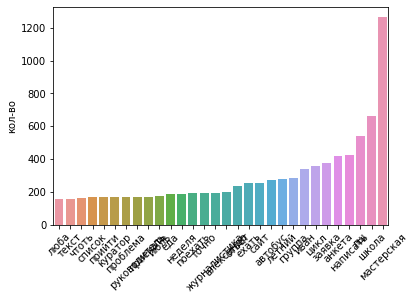

In [36]:
wf_comments = wf_comments.sort_values(by=['кол-во'])
comments_plot = sns.barplot(x = wf_comments[-30:].index.values, y =wf_comments['кол-во'][-30:])
comments_plot.set_xticklabels(comments_plot.get_xticklabels(), rotation=45)
comments_plot

Люба, Иван и Александр - самые частые имена комментаторов.